In [12]:
import nltk
from nltk.corpus import brown, movie_reviews

from sklearn.decomposition import PCA
from gensim.models.keyedvectors import KeyedVectors
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec

import numpy as np
import matplotlib.pyplot as plt
import random
import os

### Training our word vectors on the text8 corpus
Cleaned Wikipedia text, compressed to 100MB

#### Importing the raw text file

In [13]:
sentences = word2vec.Text8Corpus('./data/text8')

In [14]:
type(sentences)

gensim.models.word2vec.Text8Corpus

#### Using all default parameters

In [15]:
model = Word2Vec(sentences)

In [16]:
model.wv.most_similar("happiness")

[('humanity', 0.8067648410797119),
 ('goodness', 0.7687233090400696),
 ('pleasure', 0.751976490020752),
 ('mankind', 0.7440491318702698),
 ('compassion', 0.7376595139503479),
 ('dignity', 0.7375922799110413),
 ('immortality', 0.725612223148346),
 ('salvation', 0.7225642800331116),
 ('desires', 0.7220003008842468),
 ('righteousness', 0.7208712697029114)]

In [17]:
model.wv.most_similar("queen")

[('princess', 0.7664999961853027),
 ('elizabeth', 0.7646865248680115),
 ('prince', 0.715013325214386),
 ('king', 0.6972287893295288),
 ('consort', 0.6669116020202637),
 ('mary', 0.6522044539451599),
 ('duchess', 0.6507757902145386),
 ('crown', 0.647301971912384),
 ('regent', 0.6372990608215332),
 ('scotland', 0.6196081042289734)]

#### Semantic regularities captured in word embeddings

In [18]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.666466474533081),
 ('princess', 0.6259602308273315),
 ('prince', 0.6248079538345337),
 ('throne', 0.6032742261886597),
 ('elizabeth', 0.5954141020774841)]

In [19]:
model.wv.most_similar(positive=['woman', 'hero'], negative=['man'], topn=5)

[('heroine', 0.647438645362854),
 ('magician', 0.641472339630127),
 ('protagonist', 0.6381237506866455),
 ('warrior', 0.6230526566505432),
 ('idol', 0.6097562909126282)]

### Visualizing these word vectors

In [21]:
X = model.wv[model.wv.index_to_key]

##### We'll use PCA to reduce and visualize in 2 dimensions

In [22]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

Randomly select 100 words

In [23]:
random.seed(42)

In [24]:
ind = random.sample(range(0,len(X)),100)
result_random = result[ind]
all_words = list(model.wv.index_to_key)
words = [all_words[i] for i in ind]

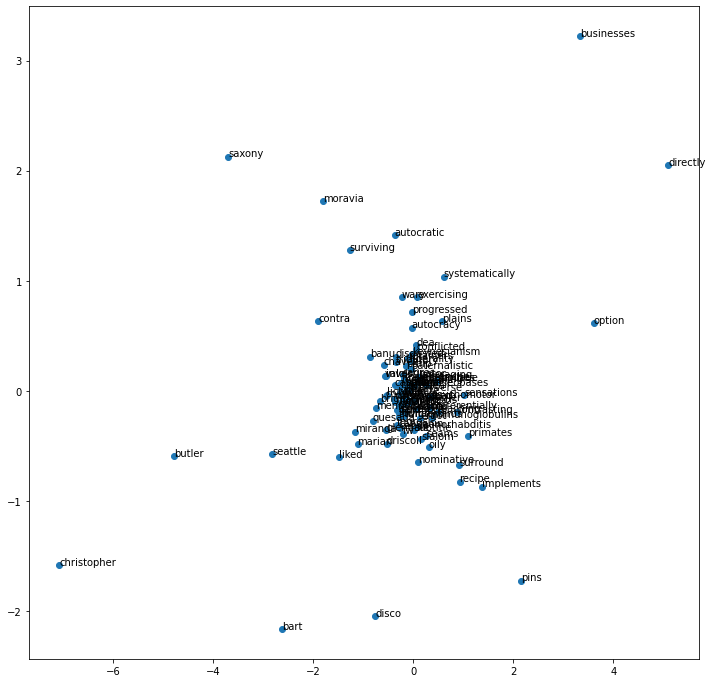

In [25]:
plt.figure(figsize=(12,12))
plt.scatter(result_random[:,0], result_random[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result_random[i, 0], result_random[i, 1]))
plt.show()

## Effect of vector dimension

#### Reducing the length to 50

In [27]:
model = Word2Vec(sentences, vector_size=50)

In [28]:
model.wv.most_similar("money")

[('profits', 0.7958606481552124),
 ('credit', 0.7641894221305847),
 ('pay', 0.754389226436615),
 ('payment', 0.7470698356628418),
 ('royalties', 0.7272891402244568),
 ('payments', 0.7249619960784912),
 ('buying', 0.7239982485771179),
 ('funds', 0.7169767022132874),
 ('demand', 0.7168135643005371),
 ('compensation', 0.7104855179786682)]

In [29]:
model.wv.most_similar("queen", topn=5)

[('princess', 0.8391699194908142),
 ('prince', 0.8280763030052185),
 ('elizabeth', 0.8071046471595764),
 ('king', 0.802452802658081),
 ('mary', 0.7484663724899292)]

In [30]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.7493847012519836),
 ('empress', 0.7443497180938721),
 ('son', 0.7408637404441833),
 ('prince', 0.7277433276176453),
 ('throne', 0.7229028344154358)]

#### Inreasing vector length to 300

In [31]:
model = word2vec.Word2Vec(sentences, vector_size = 300)

In [32]:
model.wv.most_similar("money")

[('profits', 0.6934691667556763),
 ('payment', 0.6724361777305603),
 ('credit', 0.6636011600494385),
 ('payments', 0.6400147080421448),
 ('funds', 0.6391549110412598),
 ('cash', 0.6225419640541077),
 ('pay', 0.6197479367256165),
 ('buying', 0.6122886538505554),
 ('profit', 0.6101993918418884),
 ('savings', 0.6070839762687683)]

In [33]:
model.wv.most_similar("queen")

[('princess', 0.7283787131309509),
 ('elizabeth', 0.7081829905509949),
 ('prince', 0.6756661534309387),
 ('king', 0.6470131874084473),
 ('consort', 0.6287350654602051),
 ('mary', 0.6230229735374451),
 ('victoria', 0.5918172597885132),
 ('regent', 0.5904881954193115),
 ('crown', 0.588427722454071),
 ('isabella', 0.5784796476364136)]

In [34]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.6495667099952698),
 ('throne', 0.5723018050193787),
 ('prince', 0.5621057152748108),
 ('princess', 0.5556411147117615),
 ('daughter', 0.55234694480896)]

 
I hope it’s pretty clear from the above examples that the semantic similarity of words can vary greatly depending on the textual context. 